<a href="https://colab.research.google.com/github/toche7/mdsLab4/blob/main/Colab8_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab8.  Decision Tree

version 001

Decision Tree เป็น Model ประเภท Classification ตามเนื้อหาใน  Lecture

*** Decision Tree ใน sklearn ทำงานได้เฉพาะข้อมูลที่ตัวเลขเท่านั้น

## 1. Example of using SKlearn for model development


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

```
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,y)
```



| Method | Description |
| ------------|------------ |
| fit(X, y ) | Build a decision tree classifier from the training set (X, y).|
| predict(X) | Predict class or regression value for X. |
| score(X, y) | Return the mean accuracy on the given test data and labels.|

## 1.1 Data Preparation
เช่น เดียวกับ Model  อื่นที่ใช้ใน sklearn จะต้องเตรียมข้อมูลให้ตรงกับความต้องการคือ X ต้องข้อมูลประเภท 2 มิติ ขณะที่ y เป็นข้อมูลต้องเป็นคอลัมน์เดี่ยว หรือ มิติเดียวได้

ให้นำเข้าข้อมูล apple.csv เข้ามา


In [ ]:
#!wget https://raw.githubusercontent.com/toche7/DataSets/main/apple.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/toche7/DataSets/main/apple.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
X = df[['Weight','Size']]
X

In [ ]:
y = df['Class']  # ทำเป็น 1 มิติ [] ชั้นเดียว หรือ df.Class
y

### 1.2 Create  Model Object and Train Model

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [12]:
dt.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [13]:
dt.score(X,y)

1.0

### 1.3 Visualize Model

ทำการ uncomment code ด้านล่างด้วยการเลื่อกข้อมูลในเซลทั้งหมดแล้วกด

* windows: "control" + "/"
* mac: "command" + "/"

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
                      feature_names=X.columns,
                      class_names = df.Class.unique(),
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 1.4  Predict

In [16]:
dt.predict(X)

array(['orange', 'orange', 'orange', 'apple', 'orange', 'apple', 'apple',
       'apple', 'apple', 'orange', 'apple', 'apple', 'apple', 'orange',
       'apple', 'orange', 'orange', 'apple', 'orange', 'apple', 'orange',
       'orange', 'orange', 'orange', 'orange', 'apple', 'orange',
       'orange', 'apple', 'apple', 'apple', 'apple', 'orange', 'orange',
       'apple', 'apple'], dtype=object)

In [17]:
y

0     orange
1     orange
2     orange
3      apple
4     orange
5      apple
6      apple
7      apple
8      apple
9     orange
10     apple
11     apple
12     apple
13    orange
14     apple
15    orange
16    orange
17     apple
18    orange
19     apple
20    orange
21    orange
22    orange
23    orange
24    orange
25     apple
26    orange
27    orange
28     apple
29     apple
30     apple
31     apple
32    orange
33    orange
34     apple
35     apple
Name: Class, dtype: object

### 1.5 Score

ค่า Score ใน DT เป็นค่า Accuracy

In [18]:
dt.score(X,y)

1.0

## 2. Iris Decision Tree Model

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ตัวอย่างดอก Iris

ที่มา https://scikit-learn.org/stable/modules/tree.html

Dataset : https://en.wikipedia.org/wiki/Iris_flower_data_set

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
X = pd.DataFrame(iris.data)
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
dt2 = DecisionTreeClassifier(random_state=0)

In [27]:
dt2.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [28]:
dt2.score(X,y)

1.0

In [29]:
dt2.predict(X.iloc[100:110])  #pred @ location no. 100-110

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2.1 Data Prepare

ลองดูข้อมูลใน dataset

In [30]:
X['Target'] = y    #ต่อ คอลัมน์สุดท้าย ด้วย  คอลัมน์ชื่อ target แทนด้วยค่า y

In [32]:
X

,0,1,2,3,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
X.drop(3,axis = 0, inplace = True)  # drop col no.3 ออกไป


In [41]:
X

,0,1,2,Target
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
4,5.0,3.6,1.4,0
5,5.4,3.9,1.7,0
...,...,...,...,...
145,6.7,3.0,5.2,2
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,2
148,6.2,3.4,5.4,2


In [42]:
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


พล็อตกราฟดูระหว่างแกน 'sepal length (cm)' กับ 'sepal width (cm)'

<Axes: xlabel='1', ylabel='2'>

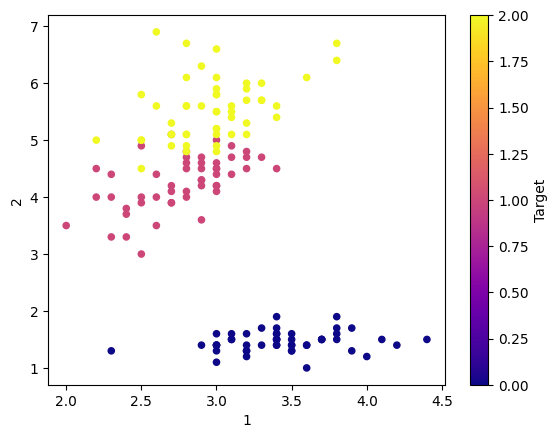

In [43]:
X.plot.scatter(1,2, c = 'Target', colormap='plasma')

In [44]:
import seaborn as sns

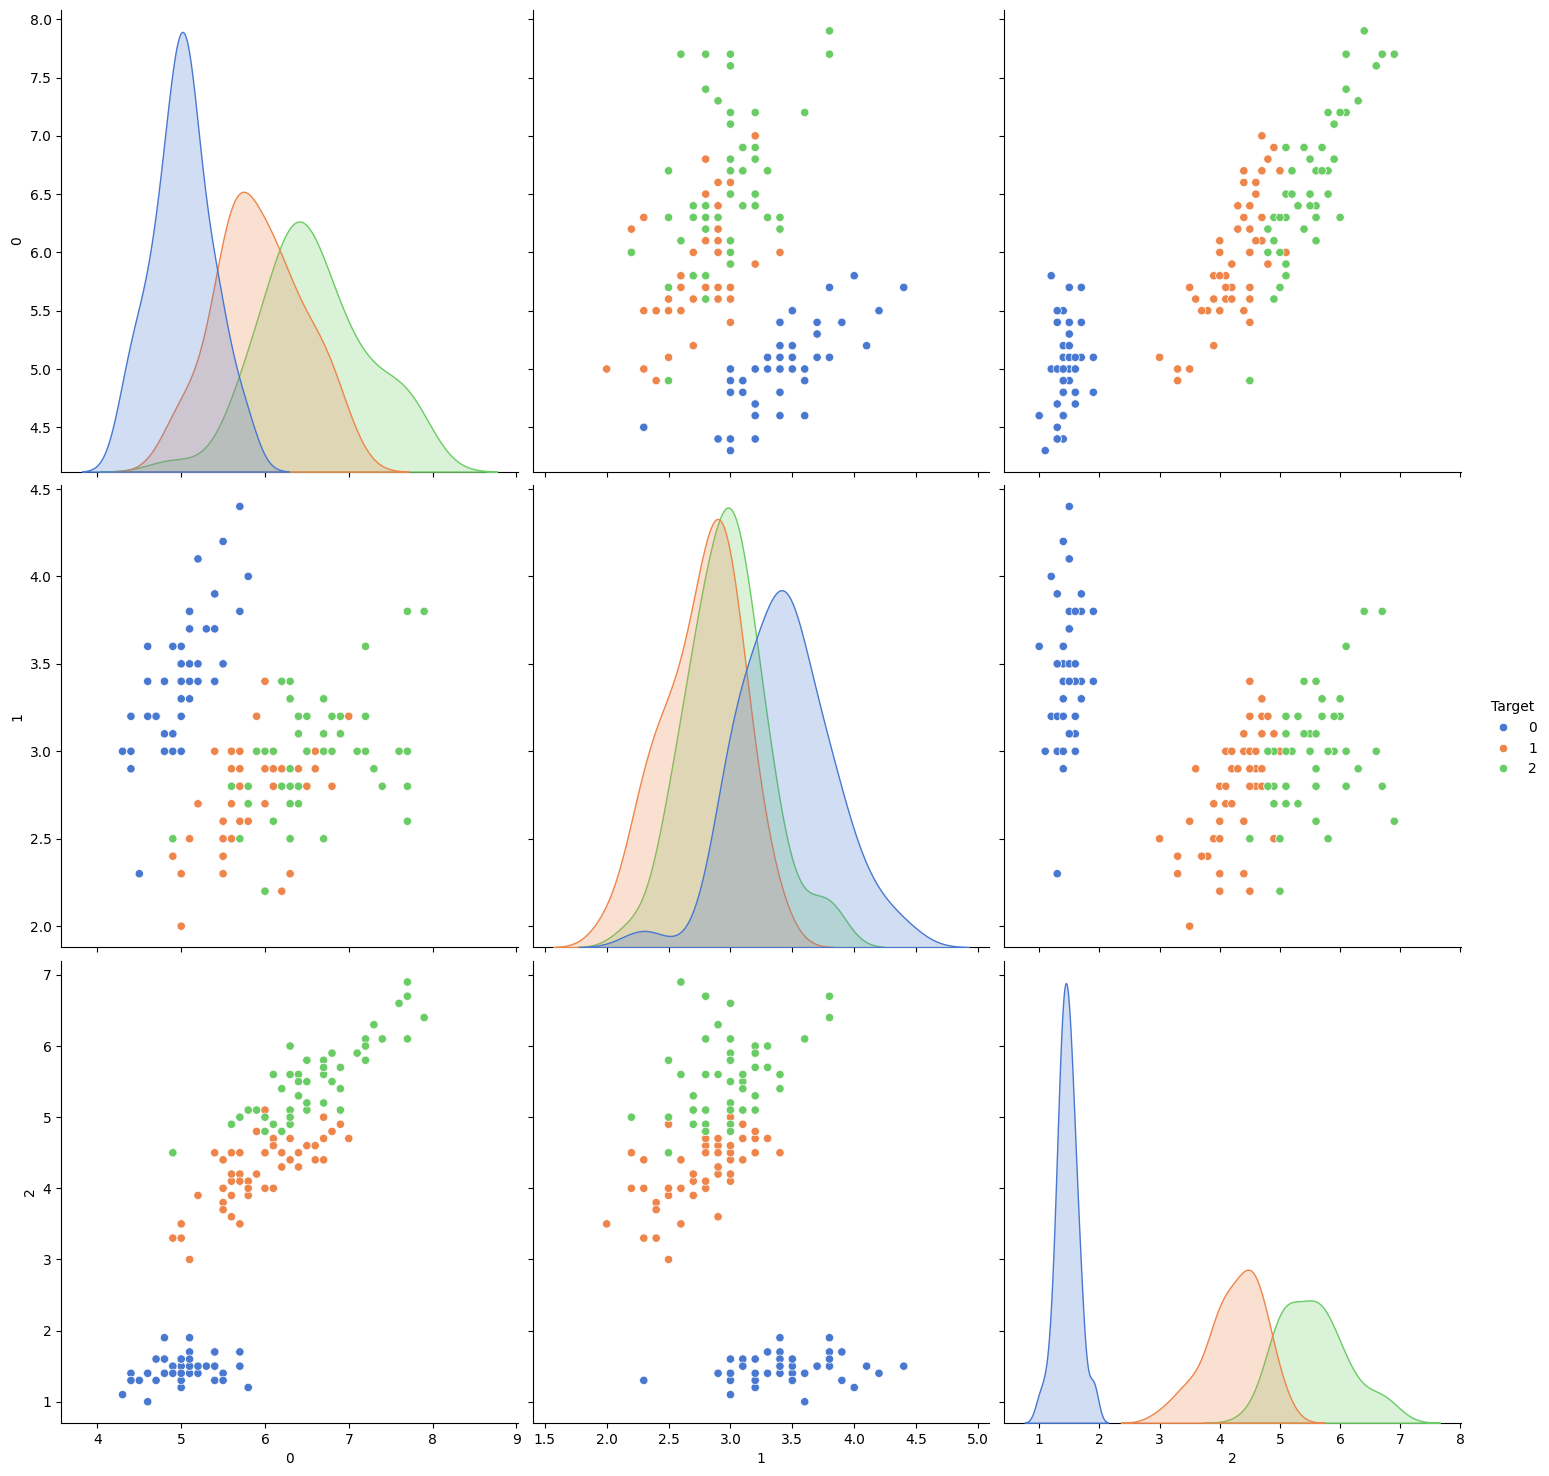

In [45]:
a=sns.pairplot(X,hue='Target',palette="muted",height=5,vars=[0,1,2,])

สร้างต้นไม้ตัดสินใจง่ายๆ จากชุดช้อมูล Dataset

### 2.2 Create Model Object and Train Model

### 2.3 Visualize Model

แสดงโครงสร้างต้นไม้ในรูปแบบ Text

In [46]:
from sklearn.tree import export_text
r = export_text(dt2, feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



แสดงโครงสร้างต้นไม้ในรูปแบบกราฟฟิก

In [ ]:
# from sklearn import tree
# import graphviz

# dot_data = tree.export_graphviz(dt2, out_file=None,
#                       feature_names=iris.feature_names,
#                       class_names=iris.target_names,
#                       filled=True, rounded=True,
#                       special_characters=True)
# graph = graphviz.Source(dot_data)
# graph

ลองทำนายผล

### 2.4 Apply Model (Predict)

### 2.5 Model Performance (Score)

## Ex 1
use the admit data for create a model from decision tree

In [47]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/toche7/DataSets/main/admit.csv")
y = data.Label
X = data[['SubjectA','SubjectB']]

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(random_state=0)
dtmodel.fit(X,y)
dtmodel.score(X,y)

1.0

In [ ]:
# from sklearn import tree
# import graphviz

# dot_data = tree.export_graphviz(dt3, out_file=None,
#                       feature_names= ['SubjectA','SubjectB'],
#                       class_names= ['No','Yes'],
#                       filled=True, rounded=True,
#                       special_characters=True)
# graph = graphviz.Source(dot_data)
# graph